<a href="https://colab.research.google.com/github/devitacm/Data-Analysis-Project-with-SQL-1/blob/main/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
import pandas as pd

data1 = files.upload()

Saving application_record (1).csv to application_record (1).csv


In [2]:
application_record = pd.read_csv(io.StringIO(data1['application_record (1).csv'].decode('utf-8')))

In [ ]:
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
plt.figure(figsize=(12,6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

In [ ]:
data2 = files.upload()

Saving credit_record (1).csv to credit_record (1) (1).csv


In [ ]:
credit_record = pd.read_csv(io.StringIO(data2['credit_record (1).csv'].decode('utf-8')))

In [ ]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
one_hot = pd.get_dummies(application_record['CODE_GENDER'], drop_first=True)
one_hot.head()

,M
0,1
1,1
2,1
3,0
4,0


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
application_record['NAME_EDUCATION_TYPE_enc']=label_encoder.fit_transform(application_record['NAME_EDUCATION_TYPE'])
application_record[['NAME_EDUCATION_TYPE','NAME_EDUCATION_TYPE_enc']].head()

,NAME_EDUCATION_TYPE,NAME_EDUCATION_TYPE_enc
0,Higher education,1
1,Higher education,1
2,Secondary / secondary special,4
3,Secondary / secondary special,4
4,Secondary / secondary special,4


In [ ]:
application_record['FLAG_PHONE']= np.where(application_record['FLAG_PHONE'] == 0, 'N', 'Y')
application_record[['FLAG_PHONE']].head()

,FLAG_PHONE
0,Y
1,Y
2,Y
3,Y
4,Y


In [ ]:
ss = preprocessing.StandardScaler()
application_record['AMT_INCOME_TOTAL_scaled']=ss.fit_transform(application_record[['AMT_INCOME_TOTAL']])
application_record[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_scaled']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_scaled
0,427500.0,2.179879
1,427500.0,2.179879
2,112500.0,-0.681502
3,270000.0,0.749189
4,270000.0,0.749189


In [5]:
application_record['AGE'] = application_record['DAYS_BIRTH']/-365
application_record['AGE'] = application_record['AGE'].apply(np.floor)
application_record[['DAYS_BIRTH','AGE']].head()

,DAYS_BIRTH,AGE
0,-12005,32.0
1,-12005,32.0
2,-21474,58.0
3,-19110,52.0
4,-19110,52.0


In [ ]:
application_record['OCCUPATION_TYPE'].isnull().sum()

134203

In [ ]:
application_record['OCCUPATION_TYPE']=application_record['OCCUPATION_TYPE'].fillna('Unknown')
application_record['OCCUPATION_TYPE'].isnull().sum()

0

In [ ]:
type(application_record.ID.values[0])

numpy.int64

In [ ]:
application_record.ID = application_record.ID.astype(str)
type(application_record.ID.values[0])

str

In [ ]:
application_record.drop(['ID', 'CODE_GENDER'], axis=1, inplace=True)

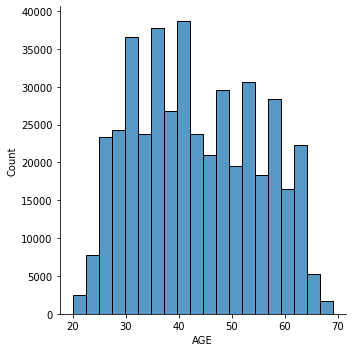

In [11]:
import seaborn as sns
sns.displot(application_record['AGE'],bins=20)

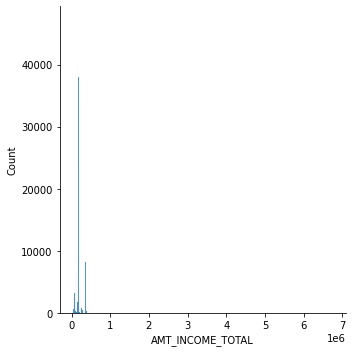

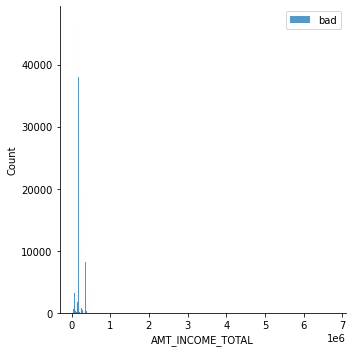

In [15]:
sns.displot(application_record['AMT_INCOME_TOTAL'], label='good')
sns.displot(application_record['AMT_INCOME_TOTAL'], label='bad')
plt.legend()

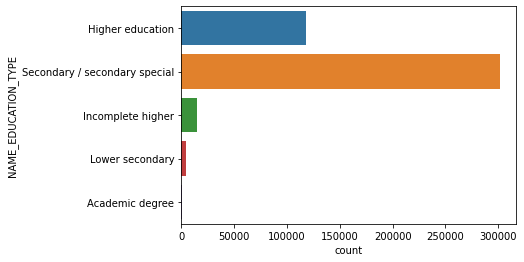

In [20]:
sns.countplot(data=application_record,y='NAME_EDUCATION_TYPE')

In [26]:
sns.countplot(data=application_record,
             x='FLAG_PHONE',
             color='default')

ValueError: ignored